In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [44]:
housing=datasets.fetch_california_housing(as_frame=True)
df=housing.frame
display(df)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [45]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


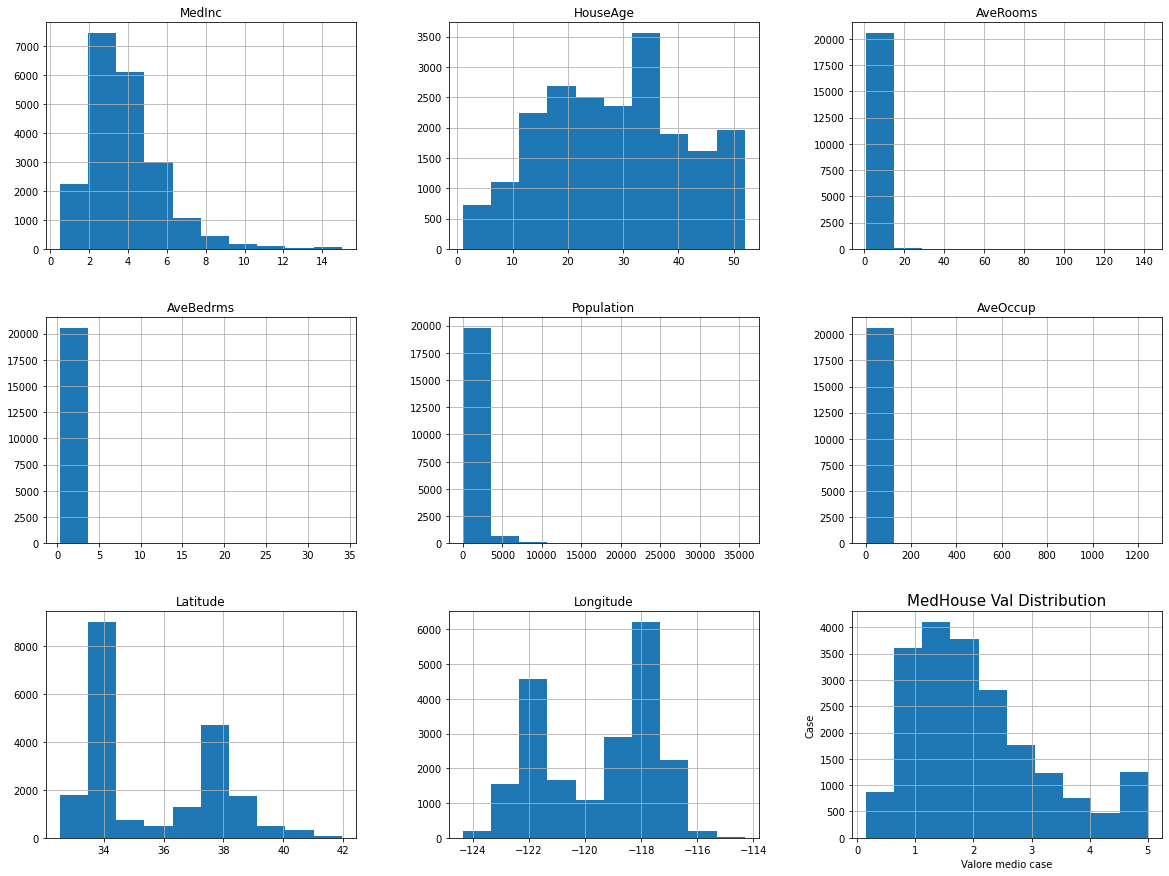

In [46]:
df.hist(figsize=(20,15))
plt.xlabel("Valore medio case")
plt.ylabel("Case")
plt.title("MedHouse Val Distribution",fontsize=15)
plt.show()

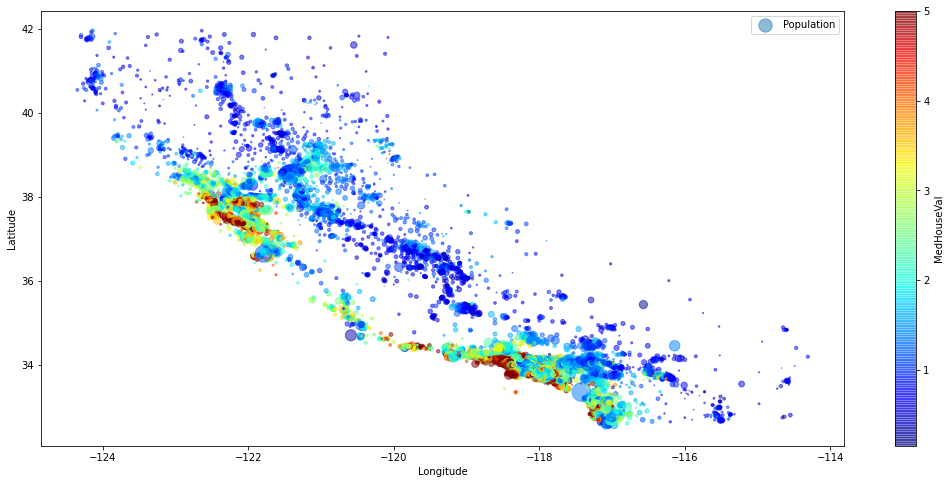

In [47]:
df.plot(
    kind='scatter',
    x='Longitude',
    y='Latitude',
    alpha=0.5,
    s=df['Population'] / 100,
    label='Population',
    figsize=(18,8),
    c="MedHouseVal",
    cmap=plt.get_cmap("jet"),
    sharex=False)

plt.legend()
plt.show()

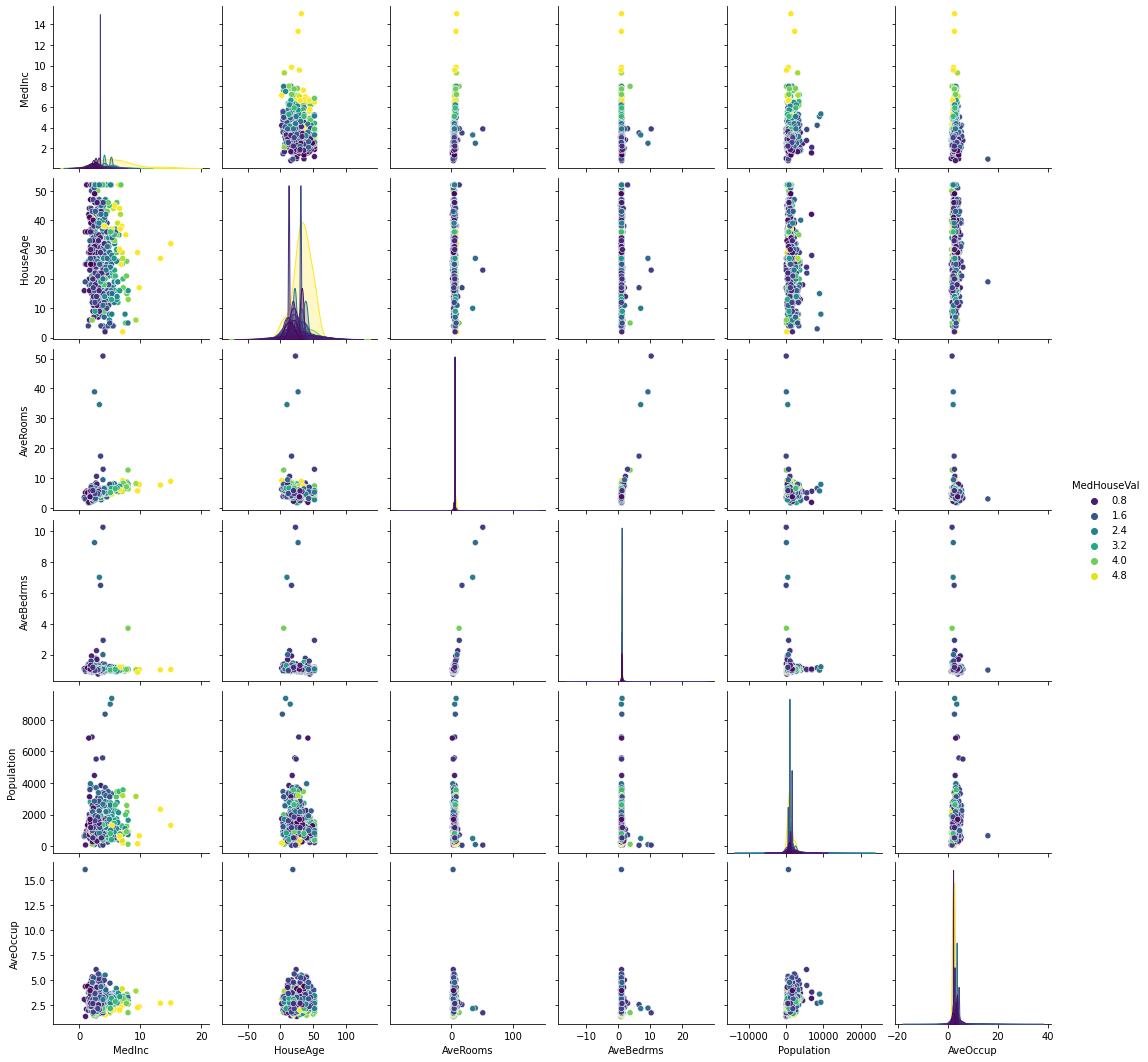

In [48]:
import seaborn as sns

rng=np.random.RandomState(0)
indices=rng.choice(np.arange(df.shape[0]),size=500,replace=False)


columns_drop=["Longitude","Latitude"]
subset=df.iloc[indices].drop(columns=columns_drop)


sns.pairplot(data=subset,hue="MedHouseVal",palette="viridis")
plt.show()

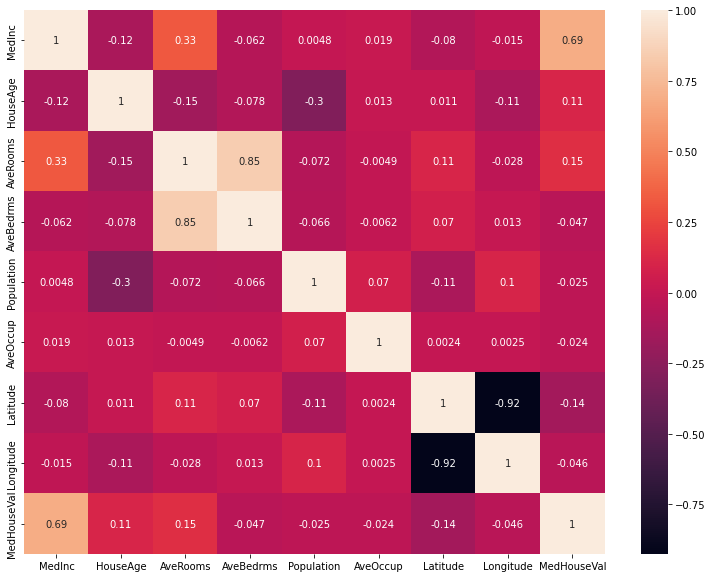

In [49]:
plt.figure(figsize=(13,10))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [50]:
corr_labels=corr_matrix["MedHouseVal"].sort_values(ascending=False)
print(corr_labels)

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


In [52]:
df.drop("AveBedrms",axis=1,inplace=True)
display(df)

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32,0.847


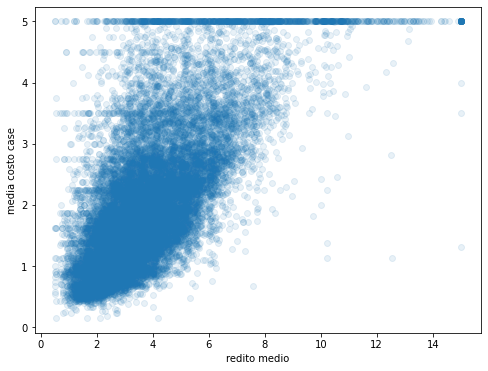

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(df["MedInc"],df["MedHouseVal"],alpha=0.1)
plt.xlabel("redito medio")
plt.ylabel("media costo case")
plt.show()

In [54]:
from sklearn.impute import SimpleImputer

imp_mean=SimpleImputer(missing_values=np.nan,strategy="median")

for column in df:
  if df[column].isnull().values.any():
    tmp=df[column].to_numpy()
    df[column]=imp_mean.fit_transform(tmp)

In [ ]:
display(df["AveRooms"].describe())

In [ ]:
sns.displot(df["AveRooms"])
plt.show()

In [ ]:
ave_rooms=df["AveRooms"].to_numpy()

plt.scatter(np.arange(ave_rooms.size),ave_rooms,alpha=0.5)
plt.show()

In [58]:
ave_rooms_up_limit=ave_rooms.mean()+(ave_rooms.std()*3)
ave_rooms_low_limit=ave_rooms.mean()-(ave_rooms.std()*3)
print("limite superiore", ave_rooms_up_limit)
print("limite superiore", ave_rooms_up_limit)

limite superiore 12.851339349190924
limite superiore 12.851339349190924
